In [2]:
%pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read a comma-separated values (csv) file into DataFrame.

The data folder contains a file named "newark_tree_data.csv". Read this file into a dataframe.


resources:
* [Pandas read csv docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)

In [4]:
# Create DataFrame here.
csv = pd.read_csv('data/newark_tree_data.csv', dtype=str, encoding='utf-8')
df = pd.DataFrame(csv)

# df = pd.DataFrame(csv)

In [5]:
# Display the first few rows of the DataFrame here.

df.head()

,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
0,11.00000,Elan Park,Elan Park,2,Blue Hen Rg,11.00000,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,40,0-5%,0-5%
1,12.00000,Elan Park,Elan Park,2,Blue Hen Rg,12.00000,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,41,0-5%,0-5%
2,13.00000,Elan Park,Elan Park,2,Blue Hen Rg,13.00000,Front,False,"pine, eastern white",Pinus strobus,...,False,False,False,False,True,False,No,54,0-5%,6-10%
3,14.00000,Elan Park,Elan Park,2,Blue Hen Rg,14.00000,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,57,11-15%,26-30%
4,15.00000,Elan Park,Elan Park,2,Blue Hen Rg,15.00000,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,55,11-15%,21-25%


In [9]:
# How many columns does the DataFrame contain?
len(df.columns)



54

In [10]:
# What attributes (columns) does this DataFrame contain?

df.describe()

,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
count,4193,4193,4169,4193,4193,4193,4193,4193,4193,4193,...,4193,4193,4193,4193,4193,4193,4193,4193,4187,4185
unique,4193,64,66,83,55,571,3,2,159,159,...,2,2,2,2,2,2,3,138,21,21
top,11.00000,ZADD 01,Rittenhouse Trail,1,W Chestnut Hill Rd,1.00000,Front,False,"ash, white",Fraxinus americana,...,False,False,False,False,False,False,No,0,0-5%,0-5%
freq,1,475,571,1063,510,108,4037,4006,585,585,...,4187,4112,4192,4165,3782,3854,3865,326,1466,2367


Upon reviewing the columns of the DataFrame, we see that there is already a column named ID that is well suited for an index column.  

For the purposes of this lab, we are only going to need a few of the available attributes. The attributes we wish to keep are listed below:
* ID
* UNIQUEID
* COMMON
* BOTANICAL
* COND
* RISK
* HEIGHT

Let's provide the index_col and the usecols args when we invoke the read_csv method.

In [12]:
# Create the new DataFrame here.
csv = pd.read_csv('data/newark_tree_data.csv', dtype=str, encoding='utf-8', index_col='UNIQUEID', usecols=['UNIQUEID', 'COMMON', 'BOTANICAL', 'COND', 'RISK', 'HEIGHT'])
df = pd.DataFrame(csv)

In [14]:
# Display the first few rows of the new DataFrame here.

df.head(10)


,COMMON,BOTANICAL,COND,RISK,HEIGHT
UNIQUEID,,,,,
LM 20150929141218,"arborvitae, eastern",Thuja occidentalis,Good,Low,40
LM 20150929141418,"arborvitae, eastern",Thuja occidentalis,Very Good,Low,40
LM 20150929141844,"pine, eastern white",Pinus strobus,Good,Low,54
LM 20150929142424,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,56
LM 20150929143018,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,55
LM 20150929143352,"pine, eastern white",Pinus strobus,Fair,Low,55
LM 20150929143905,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,55
LM 20150929144155,"pine, eastern white",Pinus strobus,Fair,Low,55
LM 20150929144438,"arborvitae, eastern",Thuja occidentalis,Fair,Low,55


The data narritive specifies that 4,193 sites were inventoried. Use the DataFrame shape attribute to verify the number of rows.

In [15]:
# How many rows does your DataFrame contain.
len(df)

4193

Let's look at the distribution of data for the HEIGHT attribute.

In [25]:
# What is the min height?
df['HEIGHT'].min()


np.int64(0)

In [28]:
# What is the max height?
df['HEIGHT'].max()

np.int64(140)

In [29]:
# How do we acquire count, mean, standard deviation, and distribution information from the DataFrame 
# by invoking a single method?
df.describe()


,HEIGHT
count,4193.000000
mean,55.311472
std,36.293489
min,0.000000
25%,23.000000
50%,50.000000
75%,86.000000
max,140.000000


# Plot a histogram using the HEIGHT attribute. 

resources:
* [Magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
* [Pandas Series Hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist)

In [42]:
# Apply magic command to display matplotlib images inline
%matplotlib inline

<Axes: >

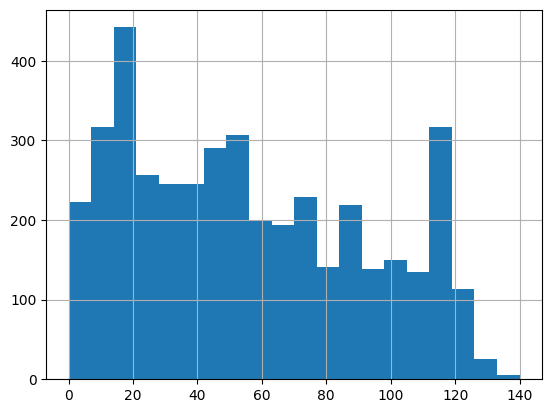

In [45]:
# Create a histogram using the HEIGHT attribute here
df['HEIGHT'].hist(bins=20)

The data narrative specifies the following:
"A total of 4,193 sites were inventoried, including 4,087 trees, 100 stumps, and 6 vacant planting sites"

Earlier, we were able to validate the total number of entries in the DataFrame. Let's now dig in a bit deeper and validate the stumps and vacant planting sites.

In [16]:
# How many entries are stumps
# stumps = df[df['BOTANICAL'] == 'STUMP']
stumps = df[(df['COMMON'] == 'stump') | (df['BOTANICAL'] == 'stump')]
num_stumps = len(stumps)
print(f"Number of stumps: {num_stumps}")




Number of stumps: 100


In [31]:
# How many entries are vacant sites
vacant = df[df['COMMON'] == 'vacant site, large']
vacant_ct = len(vacant)
vacant_ct

6

In [24]:
# Do these number add up?
res = num_stumps + vacant_ct
res

106

# Plot a bar graph using the COND attribute.

resources:
* [Pandas Series Bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html#pandas.Series.plot.bar)

In [28]:
# How can we determine all of the possible values describing the condition of a tree and their associated counts?
df['COND'].value_counts()

COND
Fair         1598
Good         1168
Poor          402
Very Good     381
Dead          218
Excellent     163
Very Poor      83
Critical       74
Name: count, dtype: int64

In [ ]:
# Were these already in the order you would want them to be in order for a graph to make sense? 
# If not, reorder  the Series.
df['COND'].value_counts(ascending=True)

COND
Critical       74
Very Poor      83
Excellent     163
Dead          218
Very Good     381
Poor          402
Good         1168
Fair         1598
Name: count, dtype: int64

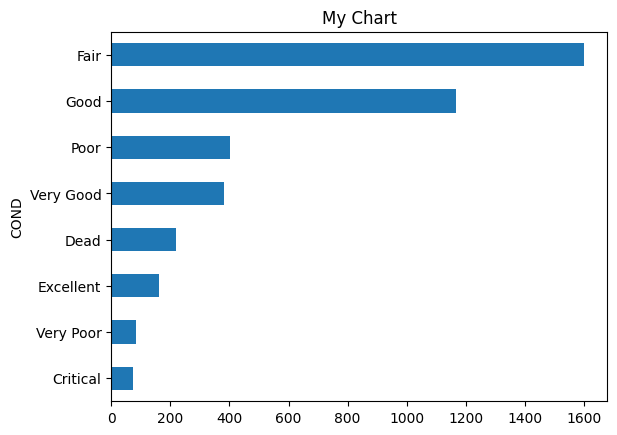

In [54]:
# Plot the Series here
plot = df['COND'].value_counts(ascending=True).plot(title='My Chart', kind='barh')

In [60]:
# How many entries have missing values for the COND attribute? Why are these values missing?
missing_vals = df['COND'].isnull().sum()

# missing_vals = df['COND'].isnull().count()
missing_vals



np.int64(106)

# Plot a pie chart using the RISK attribute.

resources:
* [Pandas Series Pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.pie.html#pandas.Series.plot.pie)
* [matplotlib pie chart docs](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie)

In [62]:
# How can we determine all of the possible values describing the RISK associated with each tree
# along with the corresponding row counts?
risk = (df['RISK'].value_counts())
risk


RISK
Low         3833
Moderate     241
High          13
Name: count, dtype: int64

In [81]:
# Create an array containing the colors green, yellow, and orange
colors = ['green', 'yellow', 'orange']
# When we create our pie chart, the colors should be associated with the attributes according to the specifications below:


# Green -> Low
# Yellow -> Moderate
# Orange -> High





<Axes: title={'center': 'Tree Risk'}, ylabel='count'>

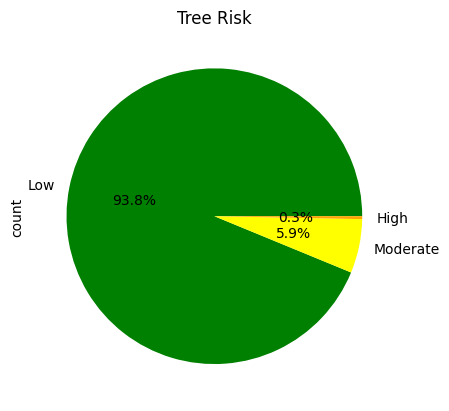

In [83]:
# Plot the pie chart here
risk.plot.pie(title='Tree Risk', colors=colors, autopct='%1.1f%%', pctdistance=0.55)

In [88]:
# How many entries have missing values for the RISK attribute? Why are these values missing?

risk_missing = df['RISK'].isnull().sum()
risk_missing


np.int64(106)

# Indexing

In [91]:
# Display row by position 1
df.iloc[1]



ID                        12.00000
ON                       Elan Park
AREA                     Elan Park
ADDRESS                          2
STREET                 Blue Hen Rg
SITE                      12.00000
SIDE                         Front
ASSIGNED                     False
COMMON         arborvitae, eastern
BOTANICAL       Thuja occidentalis
CULTIVAR                       NaN
DBH                       11.00000
REMOVAL                        NaN
STEMS                      1.00000
COND                     Very Good
MAINTPRIM                      NaN
OBSERVE                        NaN
INSPECT                      False
LOCATION                      Park
NOTES                          NaN
DATE                     9/29/2015
TIME                    2:14:17 PM
STAFF                           LM
XCOORD                553196.93222
YCOORD                611651.08843
FAILURE                 Improbable
LIKELIHOOD                Unlikely
TARGET                      Medium
CONSEQ              

In [98]:
# Display row by label 425
show = df.loc[425]
show


ID                       426.00000
ON                  Karpinski Park
AREA                Karpinski Park
ADDRESS                        345
STREET           Old Paper Mill Rd
SITE                      14.00000
SIDE                         Front
ASSIGNED                     False
COMMON              pine, Virginia
BOTANICAL         Pinus virginiana
CULTIVAR                       NaN
DBH                       30.00000
REMOVAL                        NaN
STEMS                      1.00000
COND                          Fair
MAINTPRIM                      NaN
OBSERVE                        NaN
INSPECT                      False
LOCATION                      Park
NOTES                          NaN
DATE                     10/7/2015
TIME                    9:41:52 AM
STAFF                           LM
XCOORD                565763.54194
YCOORD                616623.01794
FAILURE                   Probable
LIKELIHOOD         Somewhat Likely
TARGET                      Medium
CONSEQ              